In [1]:
  # from google.colab import drive
# drive.mount('/content/drive')

In [23]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau

In [3]:
# Paths to training and testing csv files
ROOT = "../input/sign-language-mnist/"
# ROOT = "../input/MyDrive/"
# test_path = ROOT + "/content/drive/MyDrive/sign_mnist_test/sign_mnist_test.csv"
# train_path = ROOT + "/content/drive/MyDrive/sign_mnist_train/sign_mnist_train.csv"
test_path =  "/content/drive/MyDrive/sign_mnist_test/sign_mnist_test.csv"
train_path = "/content/drive/MyDrive/sign_mnist_train/sign_mnist_train.csv"

In [4]:
# Visulaising the training data column headings
with open(train_path) as file:
    data = csv.reader(file)
    for i, row in enumerate(data):
        if i == 0:
            print(row)

['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91'

In [5]:
# Extracts data from csv files
def get_data(file_path):
    with open(file_path) as file:
        data = csv.reader(file)
        labels = []
        images = []
        for i, row in enumerate(data):
            if i == 0:
                continue
            labels.append(row[0])
            image = row[1:]
            image_array = np.array_split(image, 28)
            images.append(image_array)
    return np.array(images).astype(float), np.array(labels).astype(float)

# Extract data from train and test csv files
train_images, train_labels = get_data(train_path)
test_images, test_labels = get_data(test_path)

# Create validation data set
split = 0.8
train_split = int(split*len(train_labels))
validation_images = train_images[train_split:]
validation_labels = train_labels[train_split:]
train_images = train_images[:train_split]
train_labels = train_labels[:train_split]

In [18]:
train_images

array([[[[107.],
         [118.],
         [127.],
         ...,
         [170.],
         [170.],
         [169.]],

        [[111.],
         [121.],
         [129.],
         ...,
         [171.],
         [171.],
         [170.]],

        [[113.],
         [123.],
         [131.],
         ...,
         [171.],
         [171.],
         [171.]],

        ...,

        [[142.],
         [150.],
         [159.],
         ...,
         [202.],
         [201.],
         [200.]],

        [[142.],
         [151.],
         [160.],
         ...,
         [204.],
         [203.],
         [202.]],

        [[142.],
         [151.],
         [160.],
         ...,
         [204.],
         [203.],
         [202.]]],


       [[[155.],
         [157.],
         [156.],
         ...,
         [138.],
         [ 92.],
         [108.]],

        [[158.],
         [159.],
         [159.],
         ...,
         [142.],
         [116.],
         [143.]],

        [[161.],
         [161.],
      

In [19]:
train_labels

array([ 3.,  6.,  2., ...,  7., 12., 10.])

In [21]:
train_df = pd.read_csv('/content/drive/MyDrive/sign_mnist_test/sign_mnist_test.csv')
test_df = pd.read_csv('/content/drive/MyDrive/sign_mnist_train/sign_mnist_train.csv')

In [22]:
train_df.rename(columns={'label':'Label'},inplace = True)
test_df.rename(columns={'label':'Label'},inplace = True)

# Shuffle
train_df = train_df.sample(frac = 1.0).reset_index(drop = True)
test_df = test_df.sample(frac = 1.0).reset_index(drop = True)

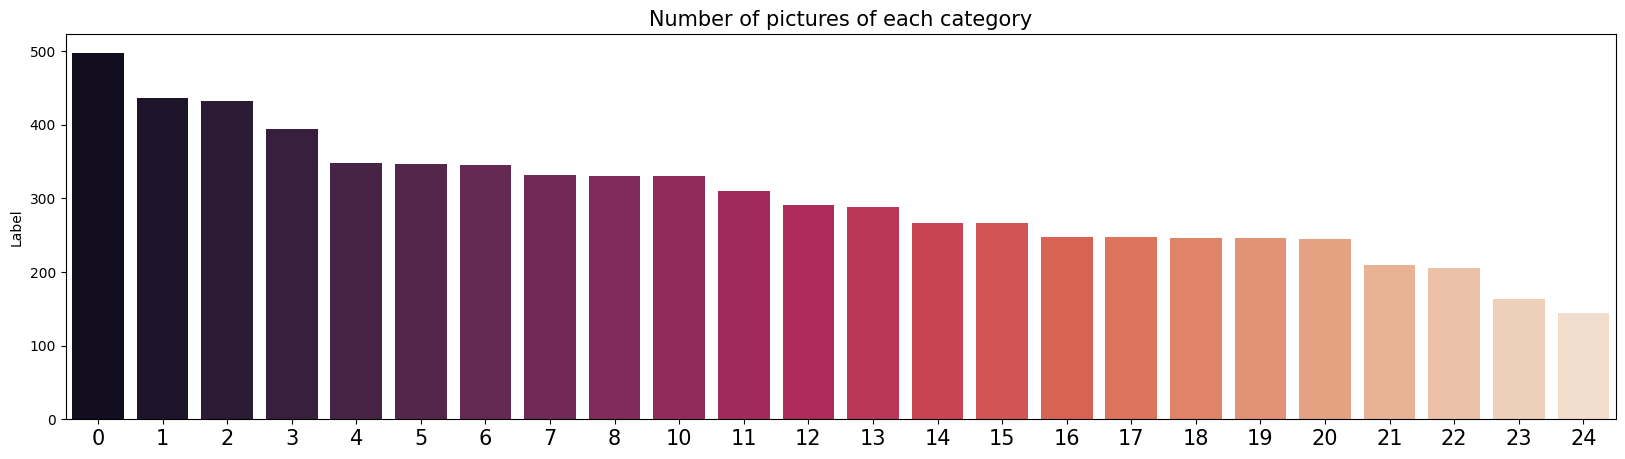

In [24]:
# Display the number of pictures of each letter
vc = train_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = sorted(vc.index), y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

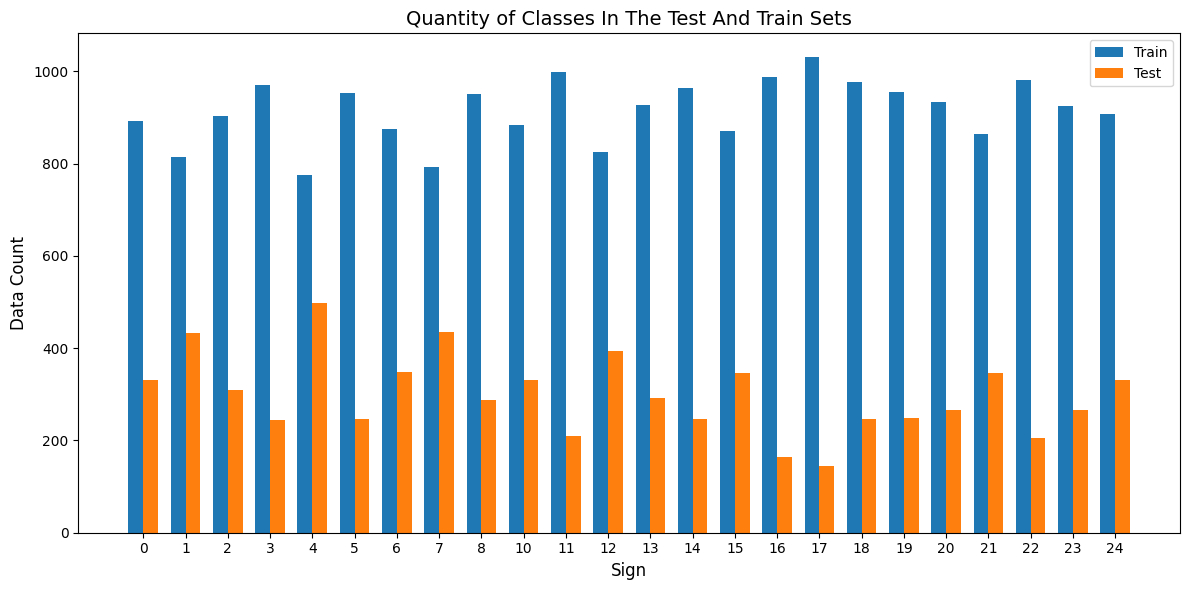

In [6]:
# Returns a list of unique labels and number of occurances for each
def counter(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return list(unique.astype(int)), list(counts)

unique_train, counts_train = counter(train_labels)
unique_test, counts_test = counter(test_labels)

# Plotting bar chart of the counts for training and testing labels
# bar locations and width
x = np.arange(len(unique_train))  
width = 0.35  

fig, ax = plt.subplots(figsize=(12,6))
test = ax.bar(x - width/2, counts_train, width, label='Train')
train = ax.bar(x + width/2, counts_test, width, label='Test')

# Add text for labels, title and x-axis tick labels
ax.set_ylabel('Data Count', fontsize=12)
ax.set_xlabel('Sign', fontsize=12)
ax.set_title('Quantity of Classes In The Test And Train Sets', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(unique_train)
ax.legend()

fig.tight_layout()

plt.show()

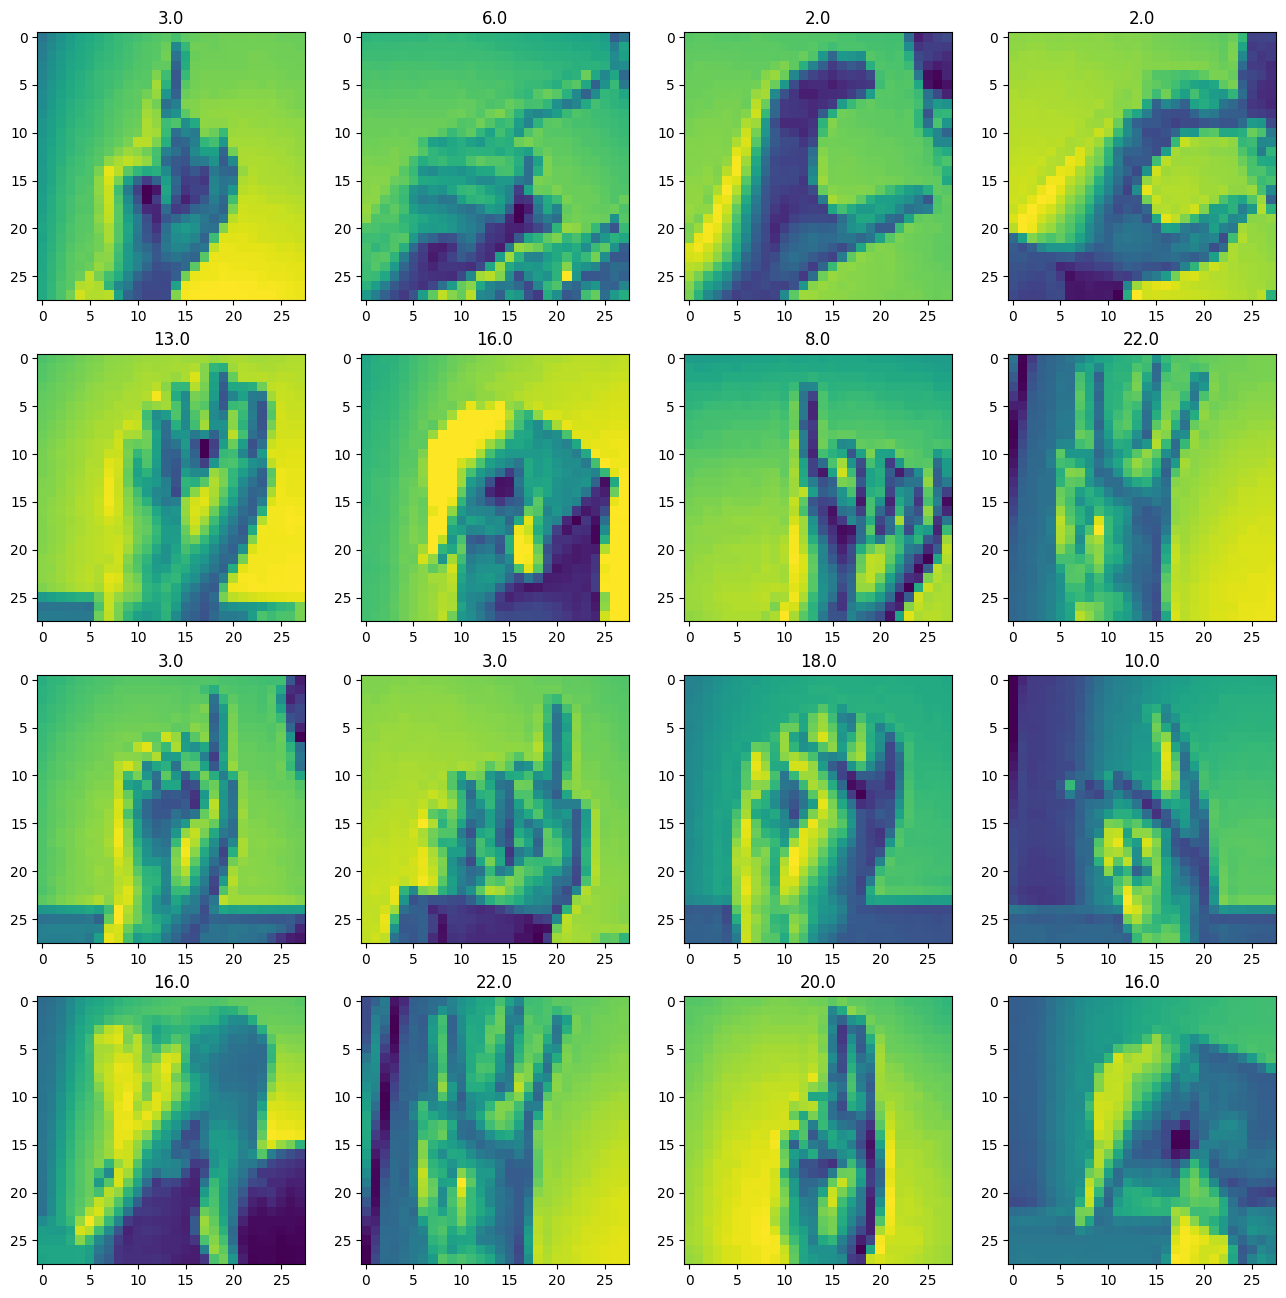

In [7]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
[axi.set_axis_off() for axi in axs.ravel()]
for i, image in enumerate(train_images[:16]):
    a = fig.add_subplot(4, 4, i + 1)
    plt.imshow(image)
    a.set_title(train_labels[i])

plt.show()

In [8]:
# Converting image dimensions to (X, 28, 28, 1)
train_images = np.expand_dims(train_images, axis=3)
validation_images = np.expand_dims(validation_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

# Training ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

train_gen = train_datagen.flow(train_images, train_labels, batch_size=32)

# Validation ImageGenerator
valid_datagen = ImageDataGenerator(
    rescale=1/255.)

valid_gen = valid_datagen.flow(validation_images, validation_labels, batch_size=32)

# Testing Image Generator
test_datagen = ImageDataGenerator(
    rescale=1/255.)

test_gen = test_datagen.flow(test_images, test_labels, batch_size=32)

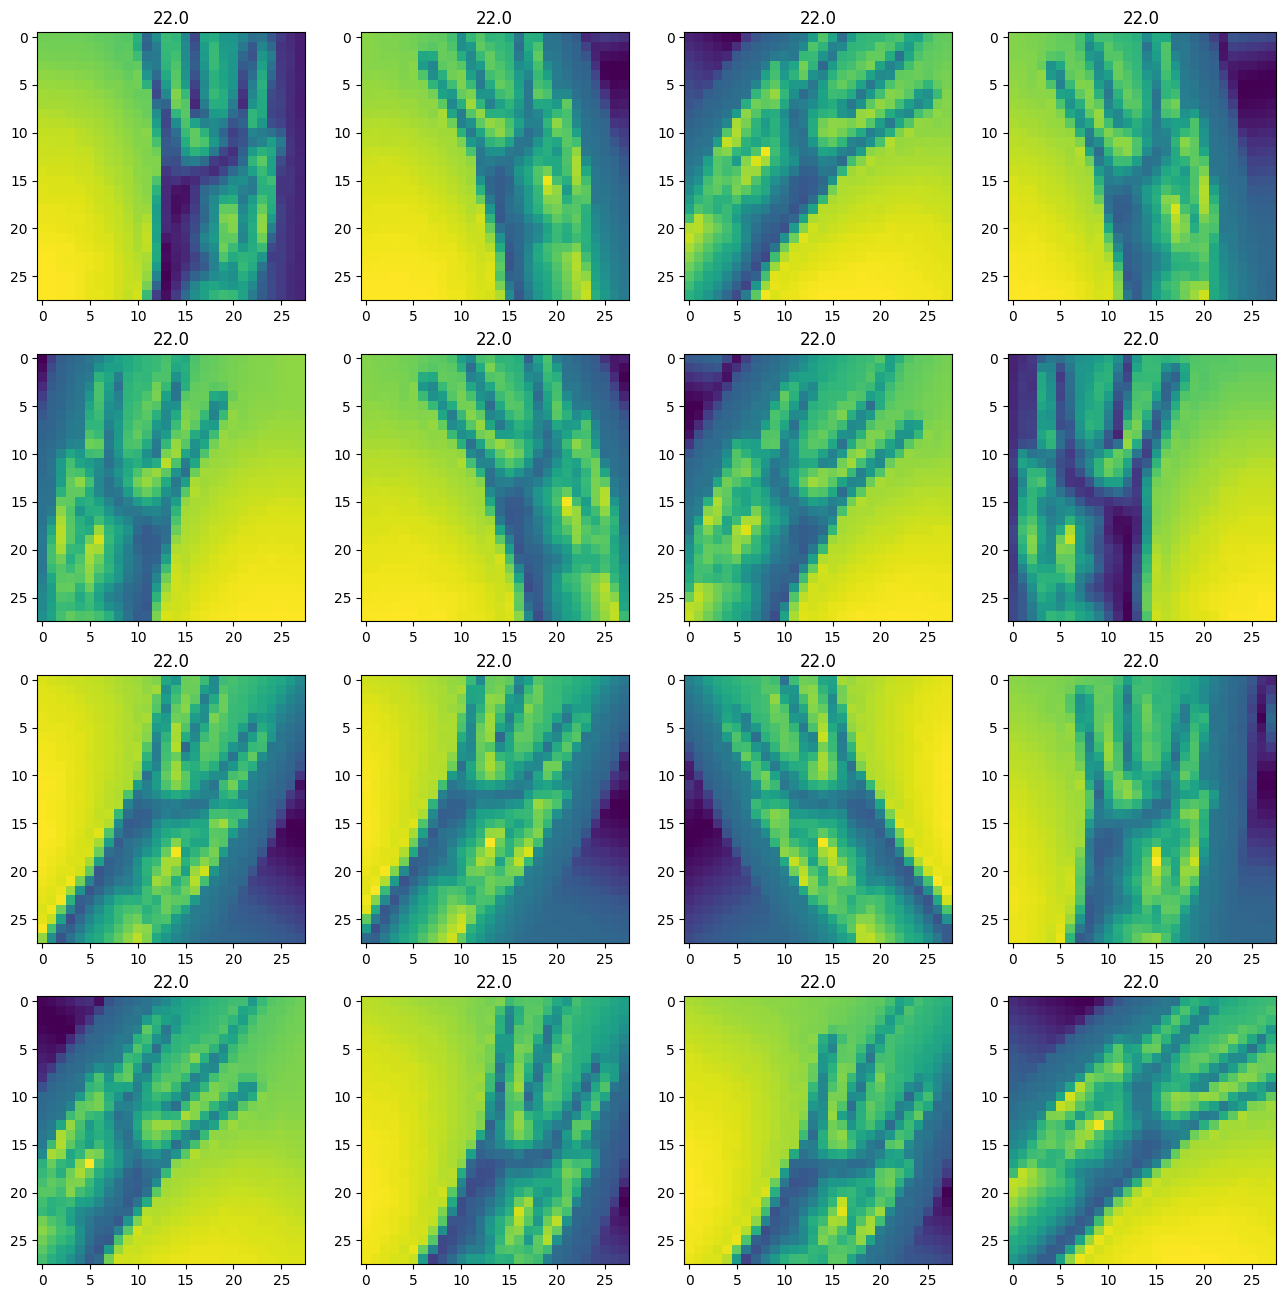

In [9]:
# Choosing an example image for augmentation
example_image = train_images[7:8]
example_label = train_labels[7:8]
example_gen = train_datagen.flow(example_image, example_label, batch_size=1)

# Plotting a grid of the example image after augmentation
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
[axi.set_axis_off() for axi in axs.ravel()]
for i in range (16):
    x_batch, y_batch = next(example_gen)
    a = fig.add_subplot(4, 4, i + 1)
    image = x_batch[0]
    plt.imshow(image[:, :, -1])
    a.set_title(y_batch[0])
plt.show()

In [10]:
# Defining the CNN 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Printing a summary of the model structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [11]:
# Fitting the model to the training data
history = model.fit_generator(
    train_gen,
    steps_per_epoch=len(train_images)/32,
    epochs=10, validation_data=valid_gen,
    validation_steps=len(validation_images)/32
)

Epoch 1/10


<ipython-input-11-12266d653ce9>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


686/686 [==============================] - 63s 90ms/step - loss: 2.3300 - accuracy: 0.2818 - val_loss: 0.9789 - val_accuracy: 0.6824
Epoch 2/10
686/686 [==============================] - 57s 82ms/step - loss: 1.1643 - accuracy: 0.6157 - val_loss: 0.5392 - val_accuracy: 0.8002
Epoch 3/10
686/686 [==============================] - 54s 79ms/step - loss: 0.8098 - accuracy: 0.7335 - val_loss: 0.3074 - val_accuracy: 0.9122
Epoch 4/10
686/686 [==============================] - 53s 77ms/step - loss: 0.6054 - accuracy: 0.7987 - val_loss: 0.1983 - val_accuracy: 0.9352
Epoch 5/10
686/686 [==============================] - 51s 75ms/step - loss: 0.4827 - accuracy: 0.8448 - val_loss: 0.1547 - val_accuracy: 0.9466
Epoch 6/10
686/686 [==============================] - 53s 77ms/step - loss: 0.3998 - accuracy: 0.8670 - val_loss: 0.1011 - val_accuracy: 0.9725
Epoch 7/10
686/686 [==============================] - 56s 81ms/step - loss: 0.3327 - accuracy: 0.8900 - val_loss: 0.0894 - val_accuracy: 0.9760
Epo

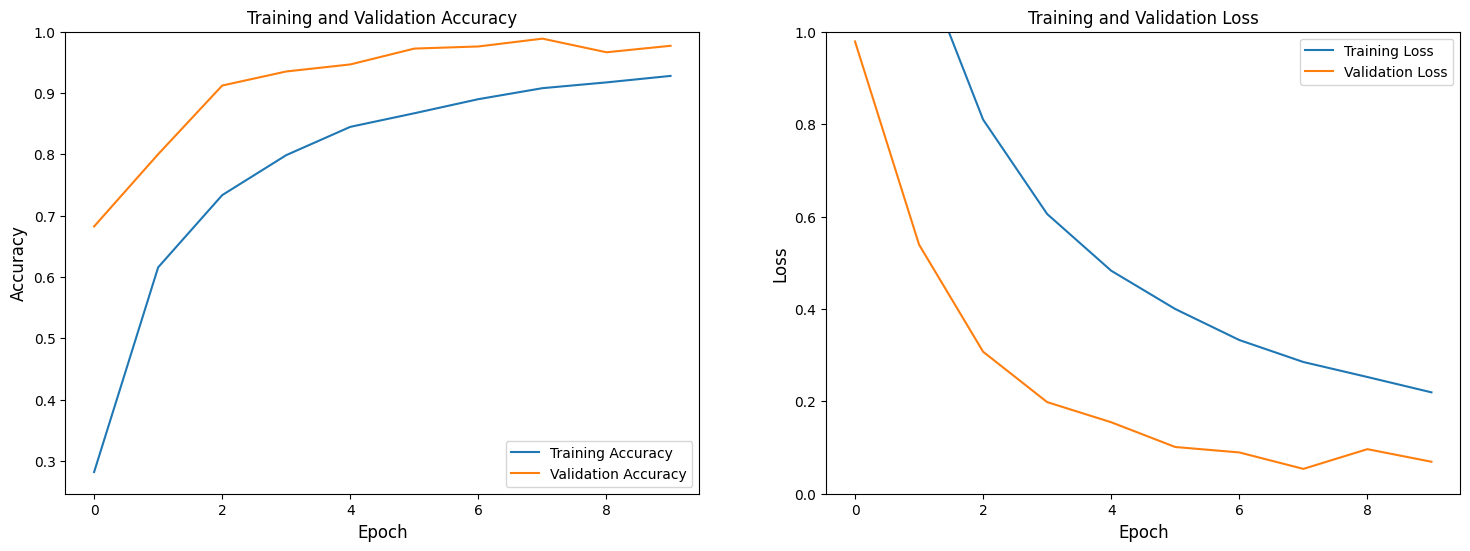

In [12]:
# Metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss', fontsize=12)
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch', fontsize=12)
plt.show()

In [13]:
# Modified Augmentations
train_datagen2 = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=30, #Reduced the rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    # Removed Flip which might change the meaning of a sign
    fill_mode='nearest')

train_gen2 = train_datagen2.flow(train_images, train_labels, batch_size=64) #Increased batch size

# Modified Model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(), # New layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),  # New layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # New layer
    tf.keras.layers.BatchNormalization(),# New layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # New layer
    tf.keras.layers.Dense(26, activation='softmax')
])

# Adding in a learning rate reducer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Compiling and printing the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# Training
history2 = model2.fit_generator(
    train_gen2, 
    steps_per_epoch=len(train_images)/64,
    epochs=15, # Training for longer 
    validation_data=valid_gen,
    validation_steps=len(validation_images)/32, 
    callbacks=[learning_rate_reduction] 
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                      

<ipython-input-13-4e3929a2c795>:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(


343/343 [==============================] - 65s 184ms/step - loss: 0.9283 - accuracy: 0.7045 - val_loss: 3.8031 - val_accuracy: 0.1790 - lr: 0.0010
Epoch 2/15
343/343 [==============================] - 61s 177ms/step - loss: 0.2193 - accuracy: 0.9272 - val_loss: 0.1280 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 3/15
343/343 [==============================] - 62s 180ms/step - loss: 0.1220 - accuracy: 0.9595 - val_loss: 0.8898 - val_accuracy: 0.7447 - lr: 0.0010
Epoch 4/15
343/343 [==============================] - 61s 177ms/step - loss: 0.0817 - accuracy: 0.9747 - val_loss: 0.0390 - val_accuracy: 0.9887 - lr: 0.0010
Epoch 5/15
343/343 [==============================] - 63s 184ms/step - loss: 0.0690 - accuracy: 0.9766 - val_loss: 0.0546 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 6/15
344/343 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.9807
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
343/343 [==============================] - 60s 17

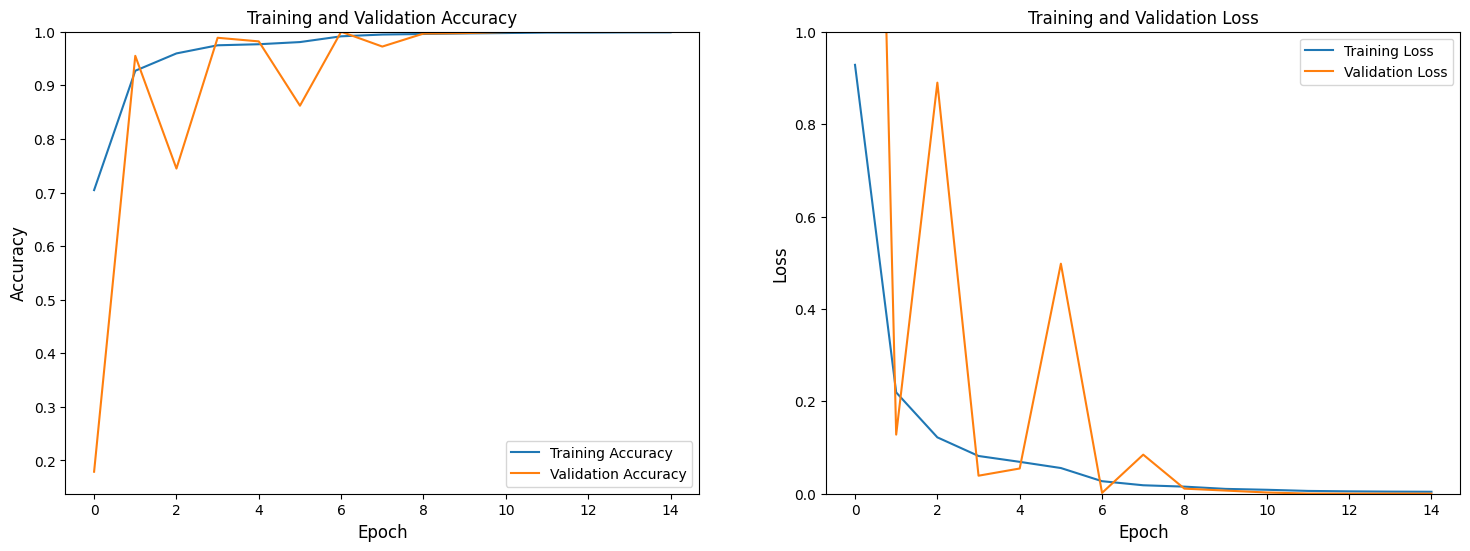

In [14]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss', fontsize=12)
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch', fontsize=12)
plt.show()

In [15]:
print("Evaluate on test data:")
results = model2.evaluate(test_gen, batch_size=len(test_images)/32)
print("test loss, test acc:", results)

Evaluate on test data:
225/225 [==============================] - 4s 18ms/step - loss: 0.0029 - accuracy: 0.9992
test loss, test acc: [0.0029312102124094963, 0.9991633892059326]


In [25]:
# Modified Augmentations
train_datagen3 = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20, #Reduced the rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    # Removed Flip which might change the meaning of a sign
    fill_mode='nearest')

train_gen3 = train_datagen3.flow(train_images, train_labels, batch_size=64) #Increased batch size

# Modified Model
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='softmax', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(), # New layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='softmax'),
    tf.keras.layers.BatchNormalization(),  # New layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='softmax'),  # New layer
    tf.keras.layers.BatchNormalization(),# New layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='softmax'),
    tf.keras.layers.Dropout(0.1),  # New layer
    tf.keras.layers.Dense(26, activation='softmax')
])

# Adding in a learning rate reducer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Compiling and printing the model
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

# Training
history3 = model3.fit_generator(
    train_gen3, 
    steps_per_epoch=len(train_images)/64,
    epochs=15, # Training for longer 
    validation_data=valid_gen,
    validation_steps=len(validation_images)/32, 
    callbacks=[learning_rate_reduction] 
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_4 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                      

<ipython-input-25-60989fbb35d0>:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(


343/343 [==============================] - 69s 195ms/step - loss: 3.1400 - accuracy: 0.1140 - val_loss: 3.2244 - val_accuracy: 0.0413 - lr: 0.0010
Epoch 2/15
343/343 [==============================] - 66s 194ms/step - loss: 2.8073 - accuracy: 0.1938 - val_loss: 2.6452 - val_accuracy: 0.2457 - lr: 0.0010
Epoch 3/15
343/343 [==============================] - 66s 193ms/step - loss: 2.5204 - accuracy: 0.2361 - val_loss: 2.4364 - val_accuracy: 0.2471 - lr: 0.0010
Epoch 4/15
343/343 [==============================] - 66s 191ms/step - loss: 2.2822 - accuracy: 0.2599 - val_loss: 2.1391 - val_accuracy: 0.2861 - lr: 0.0010
Epoch 5/15
343/343 [==============================] - 69s 201ms/step - loss: 2.0933 - accuracy: 0.2746 - val_loss: 1.9401 - val_accuracy: 0.2887 - lr: 0.0010
Epoch 6/15
343/343 [==============================] - 67s 196ms/step - loss: 1.9702 - accuracy: 0.2770 - val_loss: 1.8003 - val_accuracy: 0.2979 - lr: 0.0010
Epoch 7/15
343/343 [==============================] - 67s 196ms

In [26]:
# Modified Augmentations
train_datagen4 = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40, #Reduced the rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    # Removed Flip which might change the meaning of a sign
    fill_mode='nearest')

train_gen4 = train_datagen4.flow(train_images, train_labels, batch_size=64) #Increased batch size

# Modified Model
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(), # New layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),  # New layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # New layer
    tf.keras.layers.BatchNormalization(),# New layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # New layer
    tf.keras.layers.Dense(26, activation='softmax')
])

# Adding in a learning rate reducer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Compiling and printing the model
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.summary()

# Training
history4 = model4.fit_generator(
    train_gen4, 
    steps_per_epoch=len(train_images)/64,
    epochs=15, # Training for longer 
    validation_data=valid_gen,
    validation_steps=len(validation_images)/32, 
    callbacks=[learning_rate_reduction] 
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_7 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                      

<ipython-input-26-3548b3037901>:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model4.fit_generator(


343/343 [==============================] - 65s 184ms/step - loss: 1.0284 - accuracy: 0.6755 - val_loss: 4.1626 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 2/15
343/343 [==============================] - 61s 179ms/step - loss: 0.2751 - accuracy: 0.9102 - val_loss: 0.1934 - val_accuracy: 0.9317 - lr: 0.0010
Epoch 3/15
343/343 [==============================] - 60s 174ms/step - loss: 0.1477 - accuracy: 0.9519 - val_loss: 0.6671 - val_accuracy: 0.8197 - lr: 0.0010
Epoch 4/15
344/343 [==============================] - ETA: 0s - loss: 0.1195 - accuracy: 0.9611
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
343/343 [==============================] - 61s 179ms/step - loss: 0.1195 - accuracy: 0.9611 - val_loss: 0.2334 - val_accuracy: 0.9217 - lr: 0.0010
Epoch 5/15
343/343 [==============================] - 59s 173ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0070 - val_accuracy: 0.9980 - lr: 5.0000e-04
Epoch 6/15
343/343 [==============================] - 59

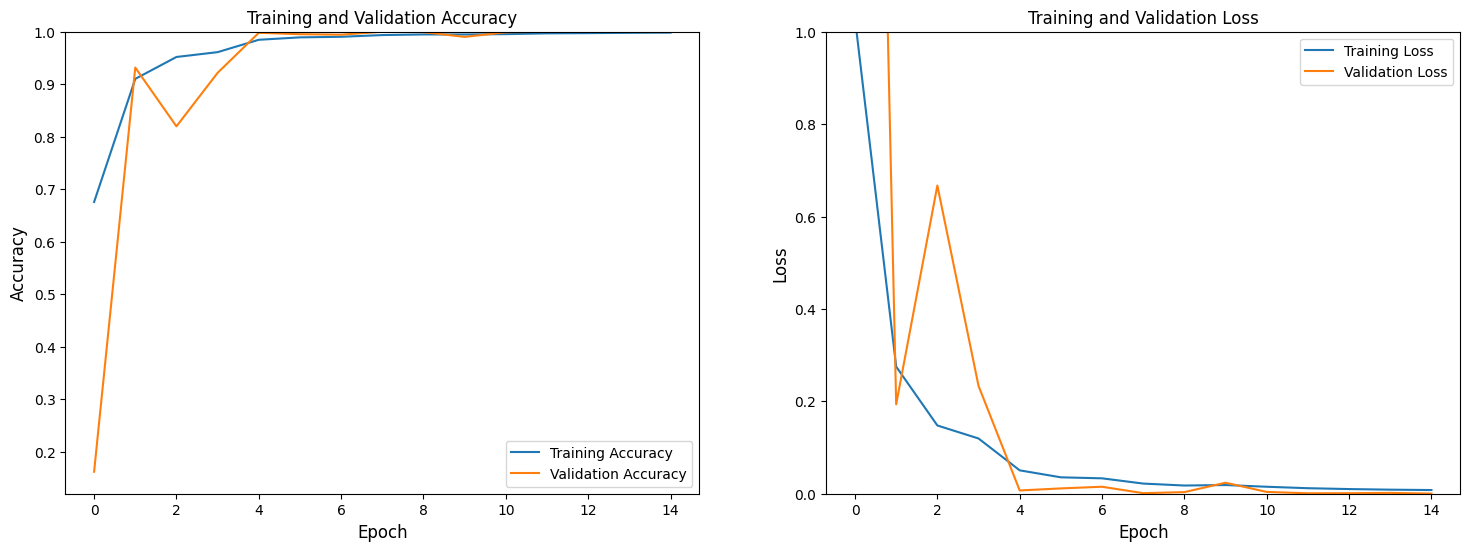

In [27]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss', fontsize=12)
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch', fontsize=12)
plt.show()

Varying no of layers

In [30]:
# Modified Augmentations
train_datagen5 = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40, #Reduced the rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    # Removed Flip which might change the meaning of a sign
    fill_mode='nearest')

train_gen5 = train_datagen5.flow(train_images, train_labels, batch_size=64) #Increased batch size

# Modified Model
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(), # New layer
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # New layer
    tf.keras.layers.BatchNormalization(),# New layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # New layer
    tf.keras.layers.Dense(26, activation='softmax')
])

# Adding in a learning rate reducer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Compiling and printing the model
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5.summary()

# Training
history5 = model5.fit_generator(
    train_gen5, 
    steps_per_epoch=len(train_images)/64,
    epochs=15, # Training for longer 
    validation_data=valid_gen,
    validation_steps=len(validation_images)/32, 
    callbacks=[learning_rate_reduction] 
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_17 (Bat  (None, 26, 26, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_18 (Bat  (None, 11, 11, 64)       256       
 chNormalization)                                                
                                                      

<ipython-input-30-6dc899affb05>:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history5 = model5.fit_generator(


343/343 [==============================] - 85s 243ms/step - loss: 1.2419 - accuracy: 0.6537 - val_loss: 6.9561 - val_accuracy: 0.0630 - lr: 0.0010
Epoch 2/15
343/343 [==============================] - 83s 241ms/step - loss: 0.3807 - accuracy: 0.8770 - val_loss: 0.3712 - val_accuracy: 0.8616 - lr: 0.0010
Epoch 3/15
343/343 [==============================] - 86s 250ms/step - loss: 0.2284 - accuracy: 0.9268 - val_loss: 1.0595 - val_accuracy: 0.7782 - lr: 0.0010
Epoch 4/15
344/343 [==============================] - ETA: 0s - loss: 0.1879 - accuracy: 0.9408
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
343/343 [==============================] - 84s 245ms/step - loss: 0.1879 - accuracy: 0.9408 - val_loss: 1.1759 - val_accuracy: 0.7638 - lr: 0.0010
Epoch 5/15
343/343 [==============================] - 84s 245ms/step - loss: 0.0769 - accuracy: 0.9752 - val_loss: 0.0476 - val_accuracy: 0.9825 - lr: 5.0000e-04
Epoch 6/15
343/343 [==============================] - 78

In [31]:
print("Evaluate on test data:")
results = model4.evaluate(test_gen, batch_size=len(test_images)/32)
print("test loss, test acc:", results)

Evaluate on test data:
225/225 [==============================] - 7s 30ms/step - loss: 0.0125 - accuracy: 0.9961
test loss, test acc: [0.012473415583372116, 0.9960959553718567]
